# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.gridspec as gridspec
# omsky_gamedev

# Загрузка датасета для регрессии.

In [3]:
models = pd.read_csv('../Data/energy_task_moded.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60.0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


# Разбиваем на выборку

In [4]:
X_train, X_test, y_train, y_test = train_test_split(models.drop('Appliances', axis=1), models['Appliances'], test_size=0.5)


# <b>Линейная регресия</b>

## Обычная линейная регресия (без гиппер параметра).

### Обуение

In [5]:
line_regression_classic = LinearRegression().fit(X_train, y_train)
line_regression_classic.predict(X_test)

array([119.21583882,  21.50362817,  54.04895915, ...,  64.67440386,
        98.73023264, 193.78763452])

### Значения ошибок: <br>
- средней абсолютной ошибки;
- средней квадраттичной ошибки (MSE);
- средней квадраттичной ошибки под корнем (RMSE);
- средней абсолютной процентной ошибки;

In [6]:
y_predicted = line_regression_classic.predict(X_test)
line_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, y_test), 
                          'RMSE': mean_squared_error(y_predicted, y_test),
                          'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                          'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                          'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {line_regression_classic.score(X_test, y_test)}',
      sep='\n')


MAE: 52.946213784926535
RMSE: 8813.331321353991
MSE: 93.8793444872406
MAPE: 0.6129256067738491
R^2: 0.16714966851376134


### Значение весов.

In [7]:
print(len(line_regression_classic.coef_), line_regression_classic.coef_, sep='\n')


29
[ 1.80533957e+00 -2.56295398e+00  1.48774493e+01 -1.78144459e+01
 -1.33214277e+01  2.61790110e+01  3.99477883e+00 -2.93485894e+00
 -7.55273248e-01 -8.36690182e-01  8.28406437e-02  6.49208802e+00
  1.91763848e-04 -1.17318649e+00 -1.54270322e+00  7.71782026e+00
 -3.88710624e+00 -8.56264371e+00 -5.07754087e-01 -5.38146437e+00
  1.04940072e-01  1.89246579e-01  1.27018313e+00  2.54141302e-01
  9.14721774e-01 -2.65740238e-01 -1.15114582e+01  0.00000000e+00
  1.38710916e-02]


### Предварительные результаты

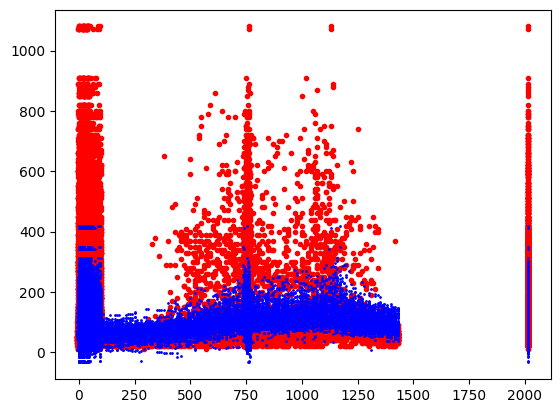

In [8]:
plt.plot(X_test, y_test, 'ro', markersize=3)
plt.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)

## Ridge (линейная регрессия + L1)

### Ridge - подборка гиппер параметра $\alpha$

In [9]:
ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
ridge_optimal_for_line_regression.best_params_

{'alpha': 0}

In [10]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_line_regression = GridSearchCV(Ridge(), {'alpha': np.arange(a, b, i)}).fit(X_train, y_train)
    if (ridge_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_line_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_line_regression.best_params_['alpha']-i
        b = ridge_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_line_regression.best_params_['alpha']  


    

0

### Ridge - обучение с подобранным гиппер параметрам $\alpha$

In [11]:
line_regression_ridge = Ridge(alpha=ridge_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_result = line_regression_ridge.predict(X_test)
line_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                'RMSE': mean_squared_error(y_predicted, y_test),
                                'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                'R^2': line_regression_classic.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {ridge_optimal_for_line_regression.score(X_test, y_test)}',
      sep='\n')
line_regression_ridge.coef_

MAE: 52.85105897851642
RMSE: 8811.54183345156
MSE: 93.8698132173041
MAPE: 0.5931362147274769
R^2: 0.16731877319601907


array([ 1.80533957e+00, -2.56295398e+00,  1.48774493e+01, -1.78144459e+01,
       -1.33214277e+01,  2.61790110e+01,  3.99477883e+00, -2.93485894e+00,
       -7.55273248e-01, -8.36690182e-01,  8.28406437e-02,  6.49208802e+00,
        1.91763848e-04, -1.17318649e+00, -1.54270322e+00,  7.71782026e+00,
       -3.88710624e+00, -8.56264371e+00, -5.07754087e-01, -5.38146437e+00,
        1.04940072e-01,  1.89246579e-01,  1.27018313e+00,  2.54141302e-01,
        9.14721774e-01, -2.65740238e-01, -1.15114582e+01, -6.95362049e+11,
        1.38710916e-02])

## Lasso (линейная регрессия + L2)

### Lasso - подборка гиппер параметра $\alpha$

In [12]:
lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.478e+07, tolerance: 8.324e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

In [13]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_line_regression = GridSearchCV(Lasso(), {'alpha': np.arange(0, 100, 1)}).fit(X_train, y_train)
    if (lasso_optimal_for_line_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_line_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_line_regression.best_params_['alpha']-i
        b = lasso_optimal_for_line_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_line_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.478e+07, tolerance: 8.324e+03 Linear regression models with null weight for the l1 regularization term are more

{'alpha': 0}

### Lasso - обучение с подобранным гиппер параметрам $\alpha$

In [25]:
line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
y_predict = line_regression_lasso.predict(X_test)
line_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                               'RMSE': mean_squared_error(y_predicted, y_test),
                               'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                               'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                               'R^2': line_regression_lasso.score(X_test, y_test)}
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {line_regression_lasso.score(X_test, y_test)}',
      sep='\n')
line_regression_lasso.coef_

C:\Users\Mike\AppData\Local\Temp\ipykernel_14152\3665724445.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  line_regression_lasso = Lasso(alpha=lasso_optimal_for_line_regression.best_params_['alpha']).fit(X_train, y_train)
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MAE: 52.94621378492696
RMSE: 8813.33132135405
MSE: 93.8793444872409
MAPE: 0.6129256067759997
R^2: 0.1671496685137558


c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.308e+07, tolerance: 1.030e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([ 1.80533957e+00, -2.56295398e+00,  1.48774493e+01, -1.78144459e+01,
       -1.33214277e+01,  2.61790110e+01,  3.99477883e+00, -2.93485894e+00,
       -7.55273248e-01, -8.36690182e-01,  8.28406437e-02,  6.49208802e+00,
        1.91763848e-04, -1.17318649e+00, -1.54270322e+00,  7.71782026e+00,
       -3.88710624e+00, -8.56264371e+00, -5.07754087e-01, -5.38146437e+00,
        1.04940072e-01,  1.89246579e-01,  1.27018313e+00,  2.54141302e-01,
        9.14721774e-01, -2.65740238e-01, -1.15114582e+01,  0.00000000e+00,
        1.38710916e-02])

# <b>Полиномиальная регрессия</b>

In [15]:
power = 2

## Обычная полиномиальная регрессия (без гиппер параметра).

In [41]:
polynomial_regression_classic = LinearRegression().fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_predicted = polynomial_regression_classic.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                        'RMSE': mean_squared_error(y_predicted, y_test),
                                        'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                        'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                        'R^2': polynomial_regression_classic.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_predict, y_test)}",
      f'RMSE: {mean_squared_error(y_predict, y_test)}',
      f'MSE: {mean_squared_error(y_predict, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predict, y_test)}',
      f'R^2: {polynomial_regression_classic.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_classic.coef_

MAE: 52.94621378492696
RMSE: 8813.33132135405
MSE: 93.8793444872409
MAPE: 0.6129256067759997
R^2: 0.2714642517280821


array([ 3.97300777e-10, -2.65024133e-06,  2.16401865e-04, -2.24028894e-05,
       -9.29405765e-05,  2.01345119e-05,  8.90226544e-05,  1.29694196e-04,
        3.18441054e-05, -2.64826767e-05,  6.61811688e-05, -1.16065410e-06,
        1.78097367e-04,  2.56133021e-05, -3.77474528e-04,  2.14203982e-05,
        1.62326553e-04, -6.47847664e-05, -4.84428461e-05,  2.27750905e-05,
        4.93913824e-06, -3.23394108e-06, -2.97616674e-06, -1.43335321e-05,
       -7.65647710e-06, -1.68271519e-04,  2.59382937e-05,  4.19156614e-04,
       -3.06373014e-10, -1.46117838e-07, -6.04317528e-02, -7.92906699e-02,
        1.21645580e-01, -7.26236163e-01, -3.88056885e-01,  3.26772437e-01,
       -2.20418902e-01, -9.82095835e-02,  2.53232601e-01, -1.15745505e-01,
       -4.96466937e-03,  2.37938895e-01,  1.37306818e-03,  1.28359869e+00,
        4.65452660e-02, -1.03088714e+00,  1.43264020e-01, -3.59547160e-01,
       -1.66216497e-01, -3.04712108e-01,  6.06697721e-02, -4.62340052e-02,
        4.21616432e-02, -

## Ridge (Полиномиальная регрессия + L1)

### Ridge (полиномиальная регрессия) - подборка гиппер параметра $\alpha$

In [17]:
ridge_optimal_for_polynomial_regression = GridSearchCV(Ridge(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
ridge_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.96195e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.93024e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.98373e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.98064e-17): result may not be

{'alpha': 2}

In [18]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    ridge_optimal_for_polynomial_regression = GridSearchCV(Ridge(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
    if (ridge_optimal_for_polynomial_regression.best_params_['alpha'] == 0):
        break
    elif (ridge_optimal_for_polynomial_regression.best_params_['alpha'] != b):
        a = ridge_optimal_for_polynomial_regression.best_params_['alpha']-i
        b = ridge_optimal_for_polynomial_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

ridge_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.96195e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.93024e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.98373e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.98064e-17): result may not be

{'alpha': 2}

### Ridge (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [19]:
polynomial_regression_ridge = Ridge(alpha=ridge_optimal_for_polynomial_regression.best_params_['alpha']).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_result = polynomial_regression_ridge.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                      'RMSE': mean_squared_error(y_predicted, y_test),
                                      'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                      'R^2': polynomial_regression_ridge.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {polynomial_regression_ridge.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_ridge.coef_

MAE: 50.64668855453615
RMSE: 7708.508594903302
MSE: 87.79811270695573
MAPE: 0.8269210611045887
R^2: 0.2715542279711519


array([ 0.00000000e+00, -2.75078564e-06,  2.14754988e-04, -2.26633779e-05,
       -9.21359503e-05,  2.04010686e-05,  8.98392067e-05,  1.29571101e-04,
        3.16159897e-05, -2.64043972e-05,  6.52283730e-05, -1.15319464e-06,
        1.78182939e-04,  2.58052697e-05, -3.76016449e-04,  2.14693168e-05,
        1.61675124e-04, -6.49147886e-05, -4.89658953e-05,  2.26596877e-05,
        5.13122306e-06, -3.15131591e-06, -3.24627255e-06, -1.43703017e-05,
       -7.66174479e-06, -1.67716167e-04,  2.58856027e-05,  4.19943084e-04,
        0.00000000e+00,  1.90748453e-06, -6.04299876e-02, -7.71896188e-02,
        1.21812696e-01, -7.27481982e-01, -3.88783069e-01,  3.24888463e-01,
       -2.19993562e-01, -9.77318343e-02,  2.53380253e-01, -1.15389003e-01,
       -4.93275818e-03,  2.37939335e-01,  1.33654291e-03,  1.28362779e+00,
        4.65922407e-02, -1.03099337e+00,  1.42952184e-01, -3.61216086e-01,
       -1.65831567e-01, -3.05093295e-01,  6.06845707e-02, -4.61717475e-02,
        4.21449338e-02, -

## Lasso (Полиномиальная регрессия + L1)

### Lasso (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [20]:
lasso_optimal_for_polynomial_regression = GridSearchCV(Lasso(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
lasso_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.021e+07, tolerance: 8.324e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.906e+07, tolerance: 8.031e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

{'alpha': 1}

In [21]:
i = 10
a = 0
b = 1000
while i > 0.0001:
    lasso_optimal_for_polynomial_regression = GridSearchCV(Lasso(), {'alpha': np.arange(1, 3, 1)}).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
    if (lasso_optimal_for_polynomial_regression.best_params_['alpha'] == 0):
        break
    elif (lasso_optimal_for_polynomial_regression.best_params_['alpha'] != b):
        a = lasso_optimal_for_polynomial_regression.best_params_['alpha']-i
        b = lasso_optimal_for_polynomial_regression.best_params_['alpha']+i
        i/=10
    else:
        a = b
        b*=2

lasso_optimal_for_polynomial_regression.best_params_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.021e+07, tolerance: 8.324e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.906e+07, tolerance: 8.031e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

{'alpha': 1}

### Lasso (полиномиальная регрессия) - обучение с подобранным гиппер параметрам $\alpha$

In [22]:
polynomial_regression_lasso = Ridge(alpha=lasso_optimal_for_polynomial_regression.best_params_['alpha']).fit(PolynomialFeatures(power).fit_transform(X_train), y_train)
y_result = polynomial_regression_lasso.predict(PolynomialFeatures(power).fit_transform(X_test))
polynomial_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, y_test),
                                      'RMSE': mean_squared_error(y_predicted, y_test),
                                      'MSE': mean_squared_error(y_predicted, y_test)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, y_test),
                                      'R^2': polynomial_regression_lasso.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}
print(f"MAE: {mean_absolute_error(y_result, y_test)}",
      f'RMSE: {mean_squared_error(y_result, y_test)}',
      f'MSE: {mean_squared_error(y_result, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_result, y_test)}',
      f'R^2: {polynomial_regression_lasso.score(PolynomialFeatures(power).fit_transform(X_test), y_test)}',
      sep='\n')
polynomial_regression_lasso.coef_

c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.56666e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE: 50.65138514657484
RMSE: 7708.9765062715815
MSE: 87.80077736712575
MAPE: 0.8469267393248807
R^2: 0.2715100108500693


array([ 0.00000000e+00, -2.68894508e-06,  2.15619195e-04, -2.26258065e-05,
       -9.25303624e-05,  2.02897330e-05,  8.92327887e-05,  1.29697917e-04,
        3.16774038e-05, -2.64124220e-05,  6.56721874e-05, -1.20872033e-06,
        1.78550331e-04,  2.48863944e-05, -3.76682940e-04,  2.13344315e-05,
        1.61991243e-04, -6.49818531e-05, -4.86091215e-05,  2.25255213e-05,
        5.16405701e-06, -3.29181300e-06, -2.84455987e-06, -1.43665321e-05,
       -7.75807535e-06, -1.68268425e-04,  2.59256595e-05,  4.19624922e-04,
        0.00000000e+00,  1.77227880e-06, -6.04308845e-02, -7.82350081e-02,
        1.21730556e-01, -7.26867888e-01, -3.88424763e-01,  3.25828676e-01,
       -2.20204602e-01, -9.79672469e-02,  2.53307439e-01, -1.15565673e-01,
       -4.94859781e-03,  2.37939360e-01,  1.35469979e-03,  1.28361742e+00,
        4.65686093e-02, -1.03093991e+00,  1.43107028e-01, -3.60392295e-01,
       -1.66023158e-01, -3.04903433e-01,  6.06773398e-02, -4.62021730e-02,
        4.21532203e-02, -

# Compared

Text(0.5, 1.0, 'polynomial_regression + L2')

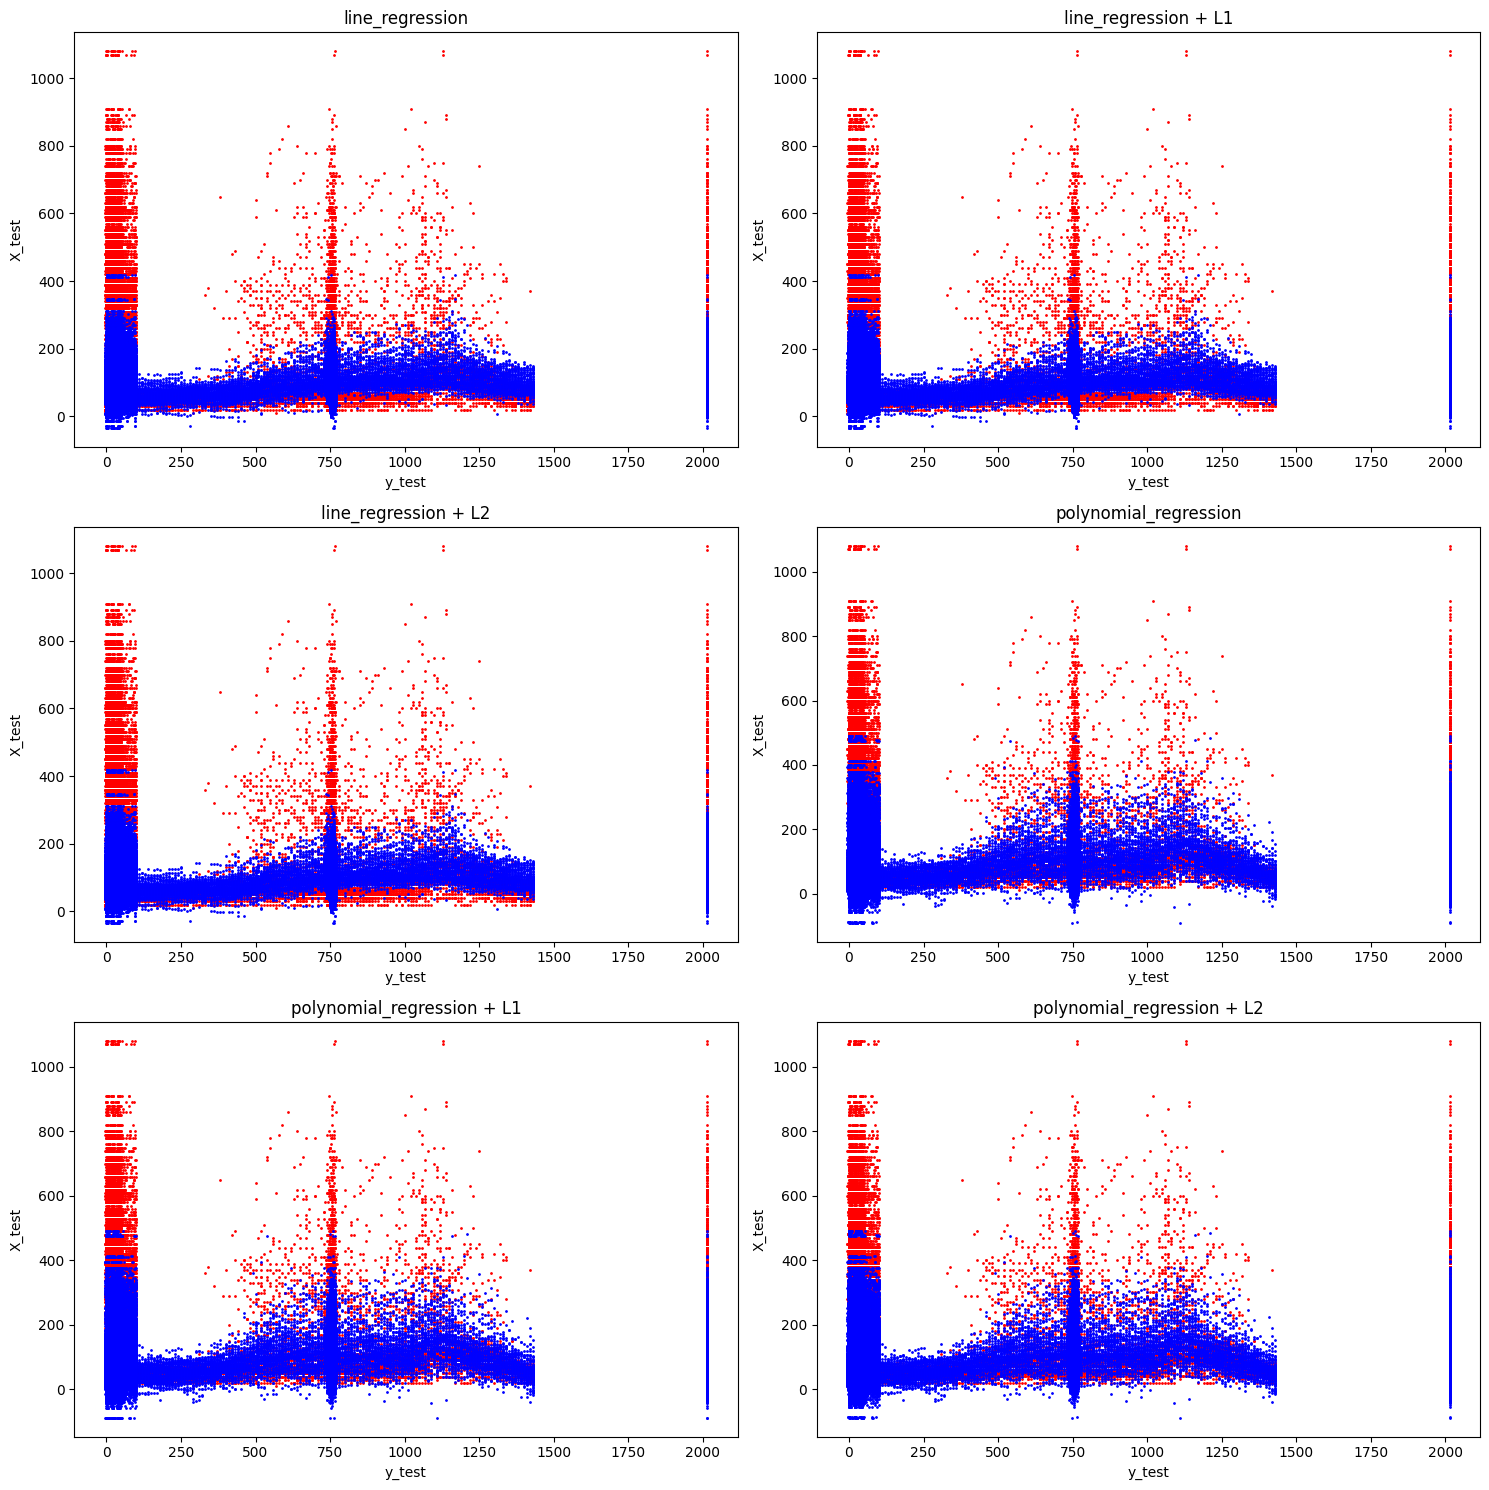

In [23]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
gs = gridspec.GridSpec(3, 2)
ax = fig.add_subplot(gs[0, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_classic.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression')
#--------------------------------
ax = fig.add_subplot(gs[0, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_ridge.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression + L1')
#--------------------------------
ax = fig.add_subplot(gs[1, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, line_regression_lasso.predict(X_test), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('line_regression + L2')
#--------------------------------
ax = fig.add_subplot(gs[1, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_classic.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression')

#--------------------------------
ax = fig.add_subplot(gs[2, 0])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_ridge.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression + L1')

#--------------------------------
ax = fig.add_subplot(gs[2, 1])
ax.plot(X_test, y_test, 'ro', markersize=1)
ax.plot(X_test, polynomial_regression_lasso.predict(PolynomialFeatures(power).fit_transform(X_test)), 'bo', markersize=1)
ax.set_ylabel('X_test')
ax.set_xlabel('y_test')
ax.set_title('polynomial_regression + L2')

In [42]:
results_errors = {'line_regression_ridge_errors': line_regression_ridge_errors, 
                  'line_regression_classic_errors': line_regression_classic_errors,
                  'line_regression_lasso_errors': line_regression_classic_errors,
                  'polynomial_regression_classic_errors': polynomial_regression_classic_errors,
                  'polynomial_regression_lasso_errors': polynomial_regression_lasso_errors,
                  'polynomial_regression_ridge_errors': polynomial_regression_ridge_errors}
pd.DataFrame(results_errors)

,line_regression_ridge_errors,line_regression_classic_errors,line_regression_lasso_errors,polynomial_regression_classic_errors,polynomial_regression_lasso_errors,polynomial_regression_ridge_errors
MAE,52.946214,52.946214,52.946214,50.656200,50.656200,50.656200
RMSE,8813.331321,8813.331321,8813.331321,7709.460735,7709.460735,7709.460735
MSE,93.879344,93.879344,93.879344,87.803535,87.803535,87.803535
MAPE,0.612926,0.612926,0.612926,2.374132,2.374132,2.374132
R^2,0.167150,0.167150,0.167150,0.271464,0.271510,0.271554
